## Gradient Descent
- In GD we try to minimize the loss function by taking partial differentiation of it with weights and Bias and update the weights and bias with gradient and learning rate
- The loss function is obviously a function of w,b etc
- Lets take a standard loss funciton i.e., Convex loss function
- I-Pad Snippet here 

### Batch-Gradient Descent/Gradient Descent
- Its Batch function works same as how perceptron batch works
- Just the updation is w_ += -N*grad_wrt_w ( same goes for bias)

In [1]:
! pip install torch

In [2]:
! pip install scikit-learn

In [3]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
import numpy as np

class grad_descent():
    def __init__(self, X_test, Y_test, X_train, Y_train, learning_rate=0.01, epochs=100):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.W = np.zeros(self.X_train.shape[1])
        self.b = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x, w, b):
        return np.dot(x, w) + b

    def learning(self):
        for i in range(self.epochs):
            grad_w = np.zeros(self.X_train.shape[1])
            grad_b = 0
            for j in range(len(self.X_train)):
                x = self.X_train[j]
                y_hat = self.activation_function(x, self.W, self.b)
                y = self.Y_train[j]

                grad_w += (y - y_hat) * x
                grad_b += (y - y_hat)

            self.W += self.learning_rate * grad_w / len(self.X_train)
            self.b += self.learning_rate * grad_b / len(self.X_train)
            
            MSE = np.mean((self.Y_train - self.predict(self.X_train))**2)
            print(f"Epoch {i} : MSE = {MSE} :: MAE = {np.mean(abs(self.Y_train - self.predict(self.X_train)))}")

    def predict(self, X):
        return np.dot(X, self.W) + self.b

    def error(self):
        print(f"Mean Squared Error: {np.mean((self.Y_test - self.predict(self.X_test))**2)}")
        # print(f"Mean Absolute Error: {np.mean(abs(self.Y_test - self.predict(self.X_test)))}")
        print(f"Root Mean Squared Error: {np.sqrt(np.mean((self.Y_test - self.predict(self.X_test))**2))}")


In [10]:
df = pd.read_csv('linreg-data.csv')
X = df.iloc[1:,1:3].values
y = df.iloc[1:,3].values

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

model = grad_descent(X_train,Y_train,X_test,Y_test,0.01,1000)
model.learning()
# print(f"Mean of Y_test: {np.mean(Y_test)}")
# model.error()


Epoch 0 : MSE = 1786.9194049270955 :: MAE = 33.518419621708084
Epoch 1 : MSE = 1756.4717007224835 :: MAE = 33.22568270559612
Epoch 2 : MSE = 1726.6685653067725 :: MAE = 32.93703821528403
Epoch 3 : MSE = 1697.4963176620056 :: MAE = 32.65343396851451
Epoch 4 : MSE = 1668.9415678285875 :: MAE = 32.374182629415884
Epoch 5 : MSE = 1640.9912107002758 :: MAE = 32.09816023875853
Epoch 6 : MSE = 1613.6324199516982 :: MAE = 31.82506849559344
Epoch 7 : MSE = 1586.8526420955611 :: MAE = 31.555492017825856
Epoch 8 : MSE = 1560.6395906667792 :: MAE = 31.289380127022767
Epoch 9 : MSE = 1534.9812405308005 :: MAE = 31.026550526363486
Epoch 10 : MSE = 1509.8658223134848 :: MAE = 30.767855921136434
Epoch 11 : MSE = 1485.2818169499217 :: MAE = 30.51235513448365
Epoch 12 : MSE = 1461.2179503496527 :: MAE = 30.25999005001083
Epoch 13 : MSE = 1437.6631881758053 :: MAE = 30.013307147716795
Epoch 14 : MSE = 1414.606730735702 :: MAE = 29.770002443239356
Epoch 15 : MSE = 1392.0380079805595 :: MAE = 29.5294442014

: 

Epoch 0 : MSE = 14967312136.433672 :: MAE = 98146.76086006792
Epoch 1 : MSE = 1.536374140496464e+17 :: MAE = 313587342.19772166
Epoch 2 : MSE = 1.5903191986096672e+24 :: MAE = 1008299008930.4891
Epoch 3 : MSE = 1.6569951956899244e+31 :: MAE = 3257811143234961.0
Epoch 4 : MSE = 1.7353036246080737e+38 :: MAE = 1.0557070942820403e+19
Epoch 5 : MSE = 1.8245137891303935e+45 :: MAE = 3.425915302340114e+22
Epoch 6 : MSE = 1.924183654447845e+52 :: MAE = 1.1134491842117783e+26
Epoch 7 : MSE = 2.0341002108406e+59 :: MAE = 3.622209545651087e+29
Epoch 8 : MSE = 2.1542346726985642e+66 :: MAE = 1.1790508040245903e+33
Epoch 9 : MSE = 2.284708970809592e+73 :: MAE = 3.8395291212991535e+36
Epoch 10 : MSE = 2.4257708561079896e+80 :: MAE = 1.25087961369249e+40
Epoch 11 : MSE = 2.5777755848278e+87 :: MAE = 4.0766180398650964e+43
Epoch 12 : MSE = 2.7411726488662945e+94 :: MAE = 1.3289724383205242e+47
Epoch 13 : MSE = 2.916496389472965e+101 :: MAE = 4.333359300602705e+50
Epoch 14 : MSE = 3.1043596161679356e+

C:\Users\dikss\AppData\Local\Temp\ipykernel_23144\1544829276.py:32: RuntimeWarning: overflow encountered in square
  MSE = np.mean((self.Y_train - self.predict(self.X_train))**2)
C:\Users\dikss\AppData\Local\Temp\ipykernel_23144\1544829276.py:26: RuntimeWarning: overflow encountered in add
  grad_w += (y - y_hat) * x
C:\Users\dikss\AppData\Local\Temp\ipykernel_23144\1544829276.py:27: RuntimeWarning: overflow encountered in scalar add
  grad_b += (y - y_hat)
C:\Users\dikss\AppData\Local\Temp\ipykernel_23144\1544829276.py:36: RuntimeWarning: invalid value encountered in add
  return np.dot(X, self.W) + self.b
C:\Users\dikss\AppData\Local\Temp\ipykernel_23144\1544829276.py:15: RuntimeWarning: invalid value encountered in scalar add
  return np.dot(x, w) + b


Epoch 52 : MSE = 2.6388925410329642e+269 :: MAE = 4.1229408169311325e+134
Epoch 53 : MSE = 2.7984694488971386e+274 :: MAE = 1.342645593694024e+137
Epoch 54 : MSE = 2.9676967363283945e+279 :: MAE = 4.3723537766947526e+139
Epoch 55 : MSE = 3.1471579401359244e+284 :: MAE = 1.4238650907175163e+142
Epoch 56 : MSE = 3.337471890261737e+289 :: MAE = 4.6368395046487085e+144
Epoch 57 : MSE = 3.5392948434209185e+294 :: MAE = 1.509993178923895e+147
Epoch 58 : MSE = 3.7533227458416975e+299 :: MAE = 4.917310494325913e+149
Epoch 59 : MSE = 3.9802936329034466e+304 :: MAE = 1.6013269981395514e+152
Epoch 60 : MSE = inf :: MAE = 5.2147343379993945e+154
Epoch 61 : MSE = inf :: MAE = 1.6981816310361912e+157
Epoch 62 : MSE = inf :: MAE = 5.53013705927374e+159
Epoch 63 : MSE = inf :: MAE = 1.8008911887566265e+162
Epoch 64 : MSE = inf :: MAE = 5.864606649355236e+164
Epoch 65 : MSE = inf :: MAE = 1.9098099627329423e+167
Epoch 66 : MSE = inf :: MAE = 6.219296818514363e+169
Epoch 67 : MSE = inf :: MAE = 2.025313

C:\Users\dikss\AppData\Local\Temp\ipykernel_23144\1609362282.py:6: RuntimeWarning: overflow encountered in square
  error.append(np.mean((Y_test - model_temp.predict(X_test))**2))


Epoch 4 : MSE = 4373746.461311529 :: MAE = 1678.1608448725228
Epoch 5 : MSE = 22221013.81774934 :: MAE = 3786.9071700496443
Epoch 6 : MSE = 113262759.75425786 :: MAE = 8546.568404262227
Epoch 7 : MSE = 578595710.1559651 :: MAE = 19312.03662710728
Epoch 8 : MSE = 2960290403.6504054 :: MAE = 43661.98358390576
Epoch 9 : MSE = 15162349336.359812 :: MAE = 98766.31698991015
Epoch 10 : MSE = 77720599893.57921 :: MAE = 223568.94874682112
Epoch 11 : MSE = 398610842469.63354 :: MAE = 506257.56845013134
Epoch 12 : MSE = 2045216102273.7383 :: MAE = 1146666.1544144526
Epoch 13 : MSE = 10496858562725.793 :: MAE = 2597789.346227539
Epoch 14 : MSE = 53885964906179.3 :: MAE = 5886066.126709907
Epoch 15 : MSE = 276670943108494.8 :: MAE = 13338413.676908178
Epoch 16 : MSE = 1420708464272441.5 :: MAE = 30227573.4615666
Epoch 17 : MSE = 7296029722661612.0 :: MAE = 68506220.99931583
Epoch 18 : MSE = 3.747127997459034e+16 :: MAE = 155261890.58178887
Epoch 19 : MSE = 1.9245684823705862e+17 :: MAE = 351890584.

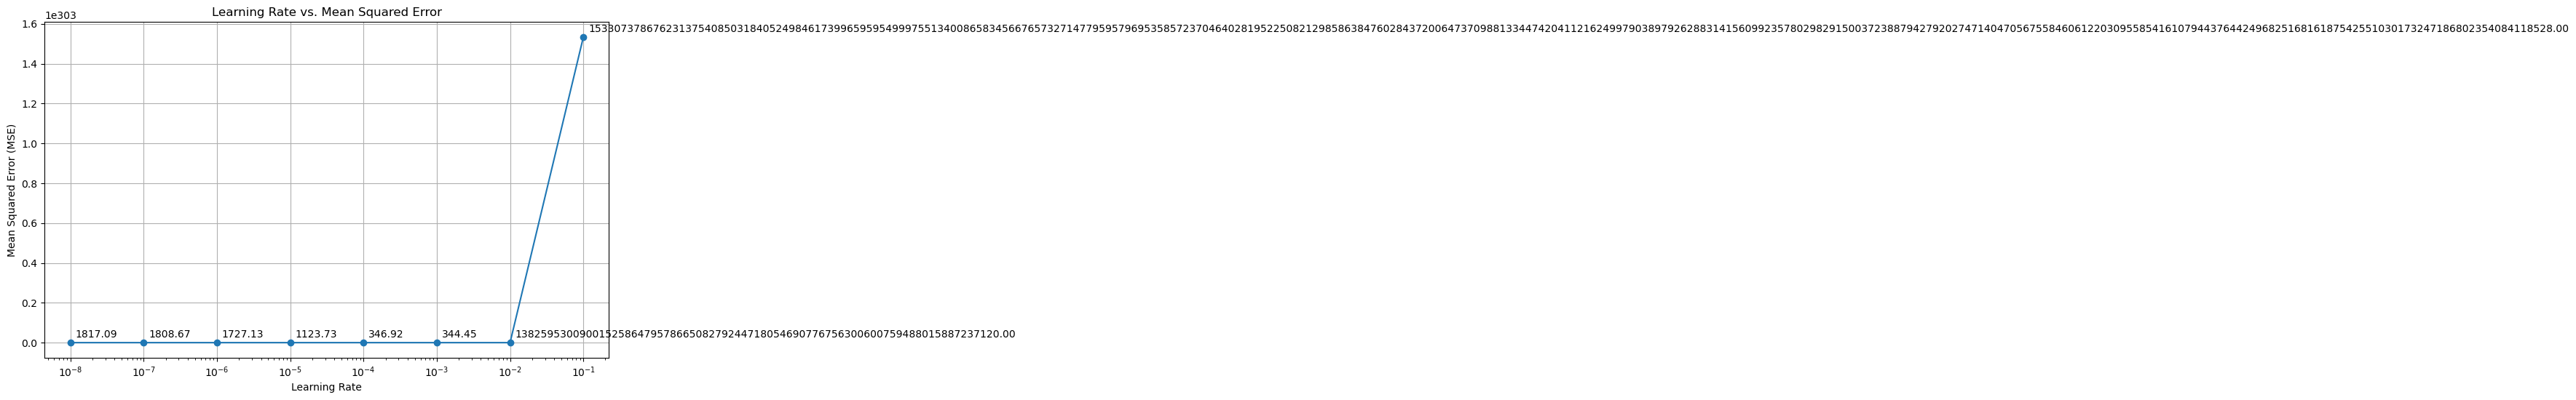

In [6]:
error = []
for i in range(10):
    learning_rate = 10/(10**i)
    model_temp = grad_descent(X_train,Y_train,X_test,Y_test,learning_rate,100)
    model_temp.learning()
    error.append(np.mean((Y_test - model_temp.predict(X_test))**2))

learning_rates = [10/(10**i) for i in range(10)]
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, error, marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Rate vs. Mean Squared Error')
plt.grid(True)

# Annotate the error values
for lr, err in zip(learning_rates, error):
    plt.annotate(f'{err:.2f}', xy=(lr, err), xytext=(5, 5), textcoords='offset points')

plt.show()


### Stochastic Gradient Descent
- This is just like simple perceptron learning algo
- The Ws and Bias is updated after each datapoint, so it can be noisy
- But, it is benifical as it may skip the local minima but is faster

In [7]:
import numpy as np

class stochastic_grad_descent():
    def __init__(self, X_test, Y_test, X_train, Y_train, learning_rate=0.01, epochs=100):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.W = np.zeros(self.X_train.shape[1])
        self.b = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x, w, b):
        return np.dot(x, w) + b

    def learning(self):
        for i in range(self.epochs):
            for j in range(len(self.X_train)):
                x = self.X_train[j]
                y_hat = self.activation_function(x, self.W, self.b)
                y = self.Y_train[j]

                self.W += self.learning_rate * (y - y_hat) * x
                self.b += self.learning_rate * (y - y_hat)
                
            MSE = np.mean((self.Y_train - self.predict(self.X_train))**2)
            print(f"Epoch {i} : MSE = {MSE} :: MAE = {np.mean(abs(self.Y_train - self.predict(self.X_train)))}")

    def predict(self, X):
        return np.dot(X, self.W) + self.b

    def error(self):
        print(f"Mean Squared Error: {np.mean((self.Y_test - self.predict(self.X_test))**2)}")
        # print(f"Mean Absolute Error: {np.mean(abs(self.Y_test - self.predict(self.X_test)))}")
        print(f"Root Mean Squared Error: {np.sqrt(np.mean((self.Y_test - self.predict(self.X_test))**2))}")


In [8]:
df = pd.read_csv('linreg-data.csv')
X = df.iloc[1:,1:3].values
y = df.iloc[1:,3].values

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

model = stochastic_grad_descent(X_train,Y_train,X_test,Y_test,0.01,1000)
model.learning()


Epoch 0 : MSE = 353.494936197694 :: MAE = 15.014624830779209
Epoch 1 : MSE = 351.8357443901608 :: MAE = 14.89092530999243
Epoch 2 : MSE = 351.9222311667541 :: MAE = 14.888045270586765
Epoch 3 : MSE = 351.92959858956254 :: MAE = 14.887971150026024
Epoch 4 : MSE = 351.93012036551767 :: MAE = 14.887969884193499
Epoch 5 : MSE = 351.9301550681004 :: MAE = 14.887969935570485
Epoch 6 : MSE = 351.93015730014014 :: MAE = 14.887969943884697
Epoch 7 : MSE = 351.9301574408532 :: MAE = 14.887969944604365
Epoch 8 : MSE = 351.9301574496108 :: MAE = 14.887969944657113
Epoch 9 : MSE = 351.9301574501512 :: MAE = 14.887969944660702
Epoch 10 : MSE = 351.93015745018437 :: MAE = 14.887969944660938
Epoch 11 : MSE = 351.9301574501864 :: MAE = 14.887969944660954
Epoch 12 : MSE = 351.9301574501866 :: MAE = 14.887969944660957
Epoch 13 : MSE = 351.9301574501866 :: MAE = 14.887969944660957
Epoch 14 : MSE = 351.9301574501866 :: MAE = 14.887969944660957
Epoch 15 : MSE = 351.9301574501866 :: MAE = 14.887969944660957
